# Explore Notebook
Shows the steps for data wrangling and some investigation for the models

In [1]:
#Imports

#Data
import pandas as pd
import numpy as np

#Date
import datetime as dt
from datetime import datetime

#Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Notebook
#pd.set_option("display.max_rows", None)
mpl.rcParams['agg.path.chunksize'] = 10000
pd.set_option('display.max_columns', None)

In [4]:
#Read CSV file
df=pd.read_csv('data/xyz_corp_lending_data.csv',sep='\t')

#Drop columns (to be explained why for each column)
df=df.drop(['policy_code','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','id','member_id','total_rec_prncp','policy_code','installment','pymnt_plan','application_type','next_pymnt_d','title','emp_title'],axis=1)

#Creating a metric to get % of null values and selecting the columns that have less than 50%
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
df=df[nullity[nullity<50].index]

#Removing text from emp_length and term columns and converting to float
df['emp_length']=df['emp_length'].str.replace('[A-Za-z\s+<>]+', '').astype('float')
df['term']=df['term'].str.replace('[A-Za-z\s+<>]+', '').astype('float')

#Converting Date Columns to YYYYMMDD format and float
date_cols=['last_pymnt_d','last_credit_pull_d','issue_d','earliest_cr_line']
for col in date_cols:
    df[col]=pd.to_datetime(df[col]).dt.strftime('%Y%m%d').astype(float)

#Filling na with median or mode
med=['tot_cur_bal','tot_coll_amt','total_rev_hi_lim','revol_util']
mod=['emp_length','last_pymnt_d','collections_12_mths_ex_med','last_credit_pull_d']
for col in med:
    df[col]=df[col].fillna(df[col].median())

for col in mod:
    df[col]=df[col].fillna(df[col].mode()[0])

#Cleaning up zip_code to only have numbers
df['zip_code']=df['zip_code'].str.replace('[A-Za-z\s+<>]+', '').astype('float')
#df['address']=df['zip_code']+df['addr_state']

#Combning two rows that are the same in verification_status column
df['verification_status']=df['verification_status'].str.replace('Source Verified','Verified')

#Encoding categorical values 
cat_columns=['purpose','verification_status','home_ownership','initial_list_status','addr_state','grade','sub_grade']
df[cat_columns] = df[cat_columns].astype('category').apply(lambda x: x.cat.codes)

#Cleaning outliers
df=df[(df['dti']<150)&(df['revol_util']<200)&(df['acc_now_delinq']<13)&(df['tot_coll_amt']<1000000)&(df['tot_cur_bal']<4000000)&(df['total_rev_hi_lim']<2000000)&(df['out_prncp']<35001)]

C:\Users\mmoy\AppData\Local\Temp\ipykernel_800\1855062075.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/xyz_corp_lending_data.csv',sep='\t')
C:\Users\mmoy\AppData\Local\Temp\ipykernel_800\1855062075.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length']=df['emp_length'].str.replace('[A-Za-z\s+<>]+', '').astype('float')
C:\Users\mmoy\AppData\Local\Temp\ipykernel_800\1855062075.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['term']=df['term'].str.replace('[A-Za-z\s+<>]+', '').astype('float')
C:\Users\mmoy\AppData\Local\Temp\ipykernel_800\1855062075.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['zip_code']=df['zip_code'].str.replace('[A-Za-z\s+<>]+', '').astype('float')


## Wrangling Related Exploration

In [39]:
#Import data from csv
df=pd.read_csv('data/xyz_corp_lending_data.csv',sep='\t')

C:\Users\mmoy\AppData\Local\Temp\ipykernel_16000\167296290.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data/xyz_corp_lending_data.csv',sep='\t')


In [40]:
#Displaying all columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [41]:
#Displaying head of datafrane
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [42]:
#Displaying info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [43]:
#Displaying some statistical values for numerical columns
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [44]:
#Creating a metric which shows the percentage of null values in each column 
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
nullity

dti_joint                    99.948596
annual_inc_joint             99.948363
verification_status_joint    99.948363
il_util                      98.643759
mths_since_rcnt_il           98.488964
                               ...    
out_prncp                     0.000000
out_prncp_inv                 0.000000
member_id                     0.000000
total_pymnt_inv               0.000000
default_ind                   0.000000
Length: 73, dtype: float64

In [45]:
#Creating a metric to get % of null values and selecting the columns that have less than 50%
df=df[nullity[nullity<50].index]

In [46]:
df['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [47]:
#Dropping policy_code as it only has one value
df=df.drop('policy_code',axis=1)

In [48]:
#Creating a correlation table with all the columns
correl=df.corr()
correl

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim,revol_util,collections_12_mths_ex_med,collection_recovery_fee,last_pymnt_amnt,id,acc_now_delinq,total_rec_late_fee,recoveries,total_pymnt,total_rec_int,total_rec_prncp,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,member_id,total_pymnt_inv,default_ind
tot_cur_bal,1.000000,-0.000331,0.384867,0.080583,-0.010622,0.005704,0.103113,0.007261,0.022804,0.008831,0.004063,0.169289,0.134022,0.157435,0.329130,0.329128,0.329152,-0.091430,0.298352,0.422618,-0.007133,0.064618,0.034806,0.244465,-0.075956,0.443059,0.311268,0.207565,0.207597,0.007284,0.169301,-0.036335
tot_coll_amt,-0.000331,1.000000,-0.005025,-0.009252,0.009686,-0.000514,-0.002568,0.004233,0.000267,-0.000592,-0.000919,-0.004203,-0.003562,-0.003788,-0.004272,-0.004272,-0.004271,0.001129,-0.003540,0.001005,-0.001995,0.000154,0.003181,0.000071,0.006816,-0.006117,0.006463,-0.000840,-0.000841,0.004266,-0.004202,-0.001921
total_rev_hi_lim,0.384867,-0.005025,1.000000,-0.117724,-0.016808,0.001399,0.062068,0.048011,0.008254,-0.005545,-0.000171,0.120593,0.073855,0.118982,0.312072,0.312071,0.312107,-0.165533,0.286857,0.271059,0.032430,-0.040575,0.006089,0.325179,-0.100227,0.820800,0.255391,0.221319,0.221361,0.047950,0.120602,-0.033620
revol_util,0.080583,-0.009252,-0.117724,1.000000,-0.035707,0.019880,-0.000939,-0.053538,-0.027270,0.019445,0.029601,0.080945,0.183754,0.036756,0.119635,0.120147,0.120931,0.271687,0.131928,0.036753,0.086649,-0.016299,-0.088353,-0.144959,-0.079050,0.217785,-0.114616,0.074353,0.074302,-0.053263,0.082181,0.044497
collections_12_mths_ex_med,-0.010622,0.009686,-0.016808,-0.035707,1.000000,-0.002866,-0.017771,0.050921,0.040197,-0.003835,-0.004684,-0.038618,-0.024670,-0.037766,-0.017042,-0.016887,-0.016556,0.012841,-0.014565,-0.003789,-0.000117,0.063019,0.007364,0.009998,0.020874,-0.022552,0.009181,0.015653,0.015638,0.051038,-0.038350,-0.010650
collection_recovery_fee,0.005704,-0.000514,0.001399,0.019880,-0.002866,1.000000,-0.026610,-0.073399,0.000557,0.078744,0.803029,0.035844,0.054602,-0.024295,0.055135,0.054898,0.053082,0.074360,0.057180,0.006805,0.002923,0.001467,0.029647,0.003990,-0.008963,0.008588,0.011048,-0.077588,-0.077588,-0.073358,0.034366,0.330764
last_pymnt_amnt,0.103113,-0.002568,0.062068,-0.000939,-0.017771,-0.026610,1.000000,-0.228774,-0.002911,-0.009496,-0.038542,0.662738,0.137991,0.744494,0.233596,0.233134,0.232029,0.107346,0.243246,0.092662,-0.028601,-0.018805,0.065455,0.029130,-0.034215,0.060027,0.087729,-0.333641,-0.333641,-0.228243,0.663272,-0.087217
id,0.007261,0.004233,0.048011,-0.053538,0.050921,-0.073399,-0.228774,1.000000,0.016849,-0.075917,-0.115269,-0.593428,-0.457397,-0.553231,0.062971,0.065192,0.069491,-0.143769,0.023647,0.034160,0.066580,0.049909,-0.118742,0.089238,0.080289,0.039686,0.031148,0.561560,0.561523,0.999431,-0.589995,-0.219832
acc_now_delinq,0.022804,0.000267,0.008254,-0.027270,0.040197,0.000557,-0.002911,0.016849,1.000000,0.002229,0.000883,-0.008220,0.002220,-0.010486,0.003572,0.003675,0.003856,0.026476,0.006273,0.014877,0.003227,0.130420,-0.004836,0.017774,-0.000293,-0.000677,0.026633,0.011834,0.011824,0.016960,-0.008021,-0.003116
total_rec_late_fee,0.008831,-0.000592,-0.005545,0.019445,-0.003835,0.078744,-0.009496,-0.075917,0.002229,1.000000,0.085700,0.054403,0.080459,0.033519,0.025966,0.025579,0.023091,0.050743,0.035728,0.009864,-0.006245,0.013992,0.022820,-0.009957,-0.011871,-0.000166,-0.005655,-0.046704,-0.046707,-0.076341,0.052077,0.140760


<AxesSubplot:>

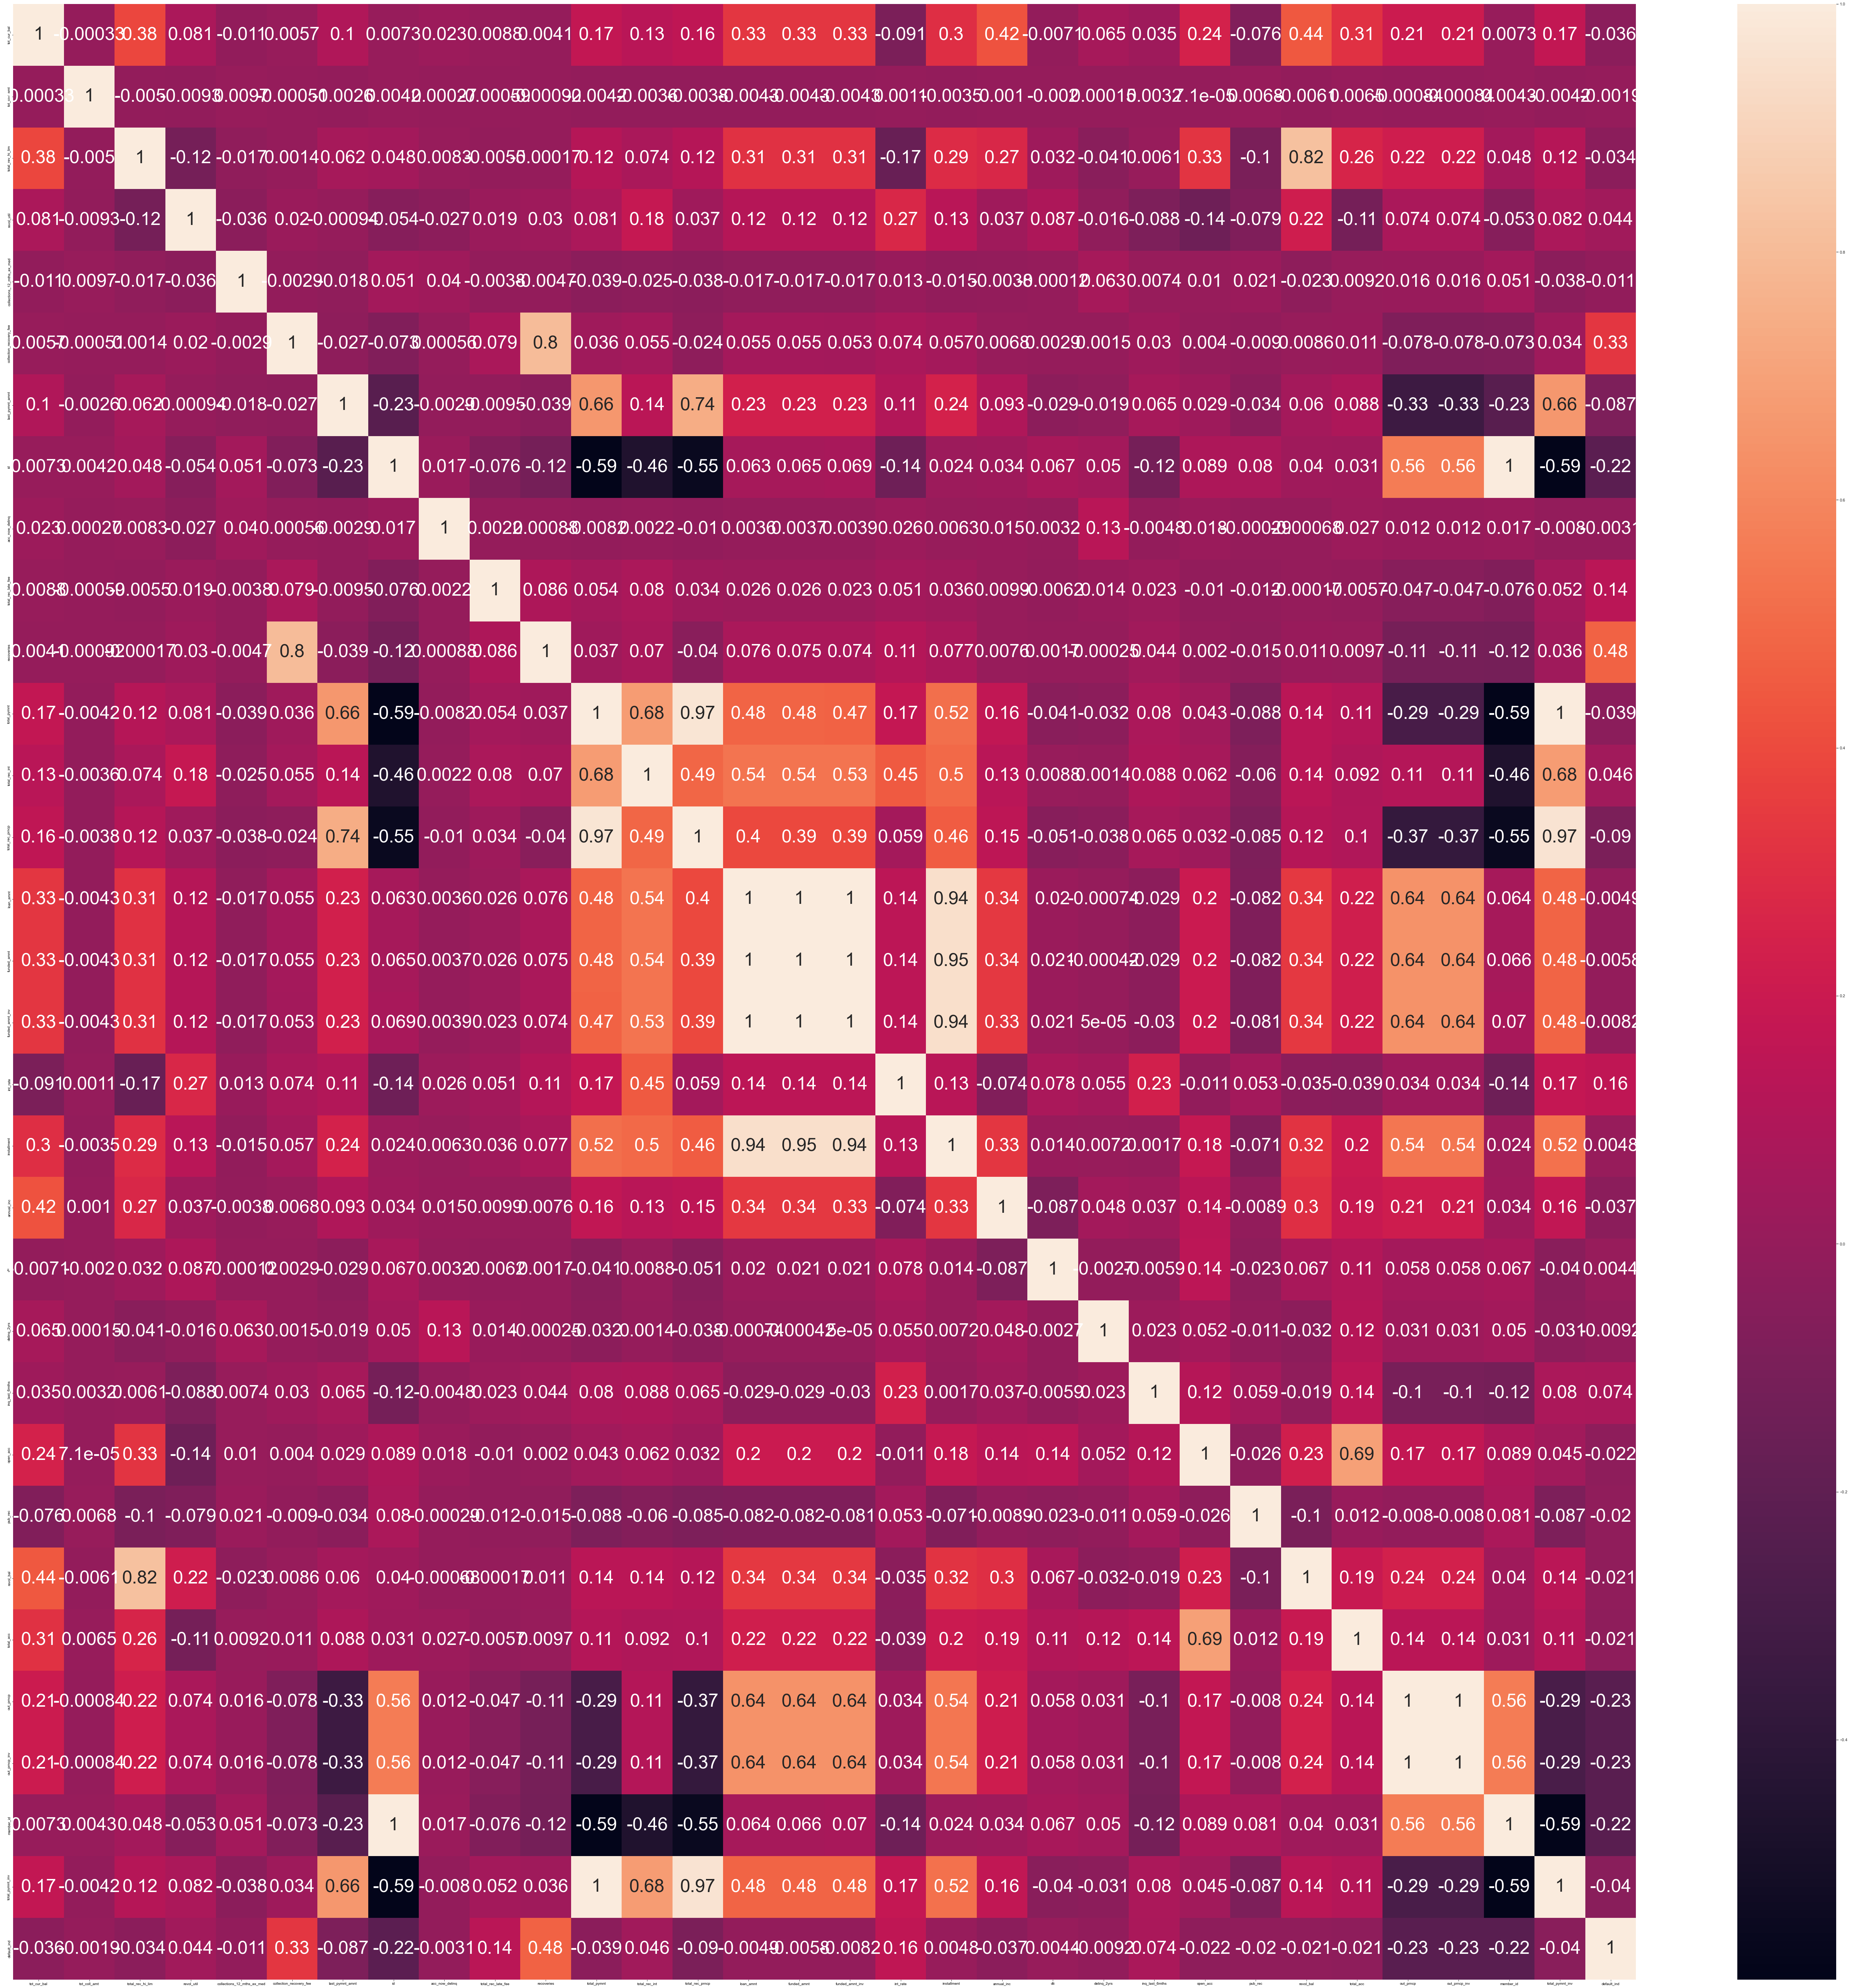

In [49]:
#Creating a correlation heatmap
fig, ax = plt.subplots(figsize=(100,100))
sns.set(font_scale = 1)
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns,annot=True,ax=ax,annot_kws={"fontsize":50})

In [50]:
#Dropping columns due to high correlation with other columns
df=df.drop(['funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','id','member_id','total_rec_prncp','installment'],axis=1)

In [51]:
#Cheking the  null % for remaining columns
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
nullity

next_pymnt_d                  29.553757
tot_cur_bal                    7.863953
tot_coll_amt                   7.863953
total_rev_hi_lim               7.863953
emp_title                      5.776261
emp_length                     5.030673
last_pymnt_d                   1.035318
revol_util                     0.052105
collections_12_mths_ex_med     0.006542
last_credit_pull_d             0.005841
title                          0.003855
purpose                        0.000000
zip_code                       0.000000
addr_state                     0.000000
earliest_cr_line               0.000000
dti                            0.000000
delinq_2yrs                    0.000000
total_acc                      0.000000
inq_last_6mths                 0.000000
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000
issue_d                        0.000000
initial_list_status            0.000000
out_prncp                      0.000000


In [52]:
#Checking all the possible values and distribution of remaining columns
col=df.columns
for col in df[col]:
    print(col, ' ' ,df[[col]].value_counts())

next_pymnt_d   next_pymnt_d
Feb-2016        534094
Jan-2016         68838
Mar-2016            66
dtype: int64
tot_cur_bal   tot_cur_bal
0.0            121
22396.0         21
29232.0         20
27316.0         20
34574.0         20
              ... 
98446.0          1
253156.0         1
253159.0         1
98437.0          1
8000078.0        1
Length: 322286, dtype: int64
tot_coll_amt   tot_coll_amt
0.0             677062
50.0              1688
100.0             1307
75.0               998
200.0              688
                 ...  
8262.0               1
8259.0               1
8258.0               1
8256.0               1
9152545.0            1
Length: 10138, dtype: int64
total_rev_hi_lim   total_rev_hi_lim
15000.0             2554
10000.0             2525
12000.0             2519
13000.0             2507
14500.0             2502
                    ... 
36004.0                1
36006.0                1
36007.0                1
36011.0                1
46086.0                1
Length

In [53]:
#Value counts on pymnt_plan
df['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

In [54]:
#Value counts on papplication_type
df['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

In [55]:
#Value counts on next_pymnt_d
df['next_pymnt_d'].value_counts()

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64

In [56]:
#Core dropping pymnt_plan and application_type due to poor distribution and next_pymnt_d as deemed irrelevant
df=df.drop(['pymnt_plan','application_type','next_pymnt_d'],axis=1)

In [57]:
#Getting info of remaning columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   tot_cur_bal                 788656 non-null  float64
 1   tot_coll_amt                788656 non-null  float64
 2   total_rev_hi_lim            788656 non-null  float64
 3   emp_title                   806526 non-null  object 
 4   emp_length                  812908 non-null  object 
 5   last_pymnt_d                847107 non-null  object 
 6   revol_util                  855523 non-null  float64
 7   collections_12_mths_ex_med  855913 non-null  float64
 8   last_credit_pull_d          855919 non-null  object 
 9   title                       855936 non-null  object 
 10  collection_recovery_fee     855969 non-null  float64
 11  last_pymnt_amnt             855969 non-null  float64
 12  acc_now_delinq              855969 non-null  float64
 13  total_rec_late

In [58]:
#Types of Attributes that are not floats/integers

#categorical

#empt_title DROPPED
#emp_length CHANGED
#title DROPPED
#purpose
#verification_status
#pymnt_plan
#home_ownership
#sub_grade
#grade
#term CHANGED
#addr_state
#zip_code DROPPED
#application_type
#initial_list_status


#date

#next_pymnt_d DROPPED
#last_pymnt_d
#last_credit_pull_d
#issue_d IMPORTANT FOR TR/TS SPLIT DONT TOUCH
#earliest_cr_line

#y
#default_ind

In [59]:
df['emp_length'].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [60]:
df['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

In [61]:
#Removing text from emp_length and term columns and converting to float
df['emp_length']=df['emp_length'].str.replace('[A-Za-z\s+<>]+', '')
df['term']=df['term'].str.replace('[A-Za-z\s+<>]+', '').astype('int')

C:\Users\mmoy\AppData\Local\Temp\ipykernel_16000\2061377709.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length']=df['emp_length'].str.replace('[A-Za-z\s+<>]+', '')
C:\Users\mmoy\AppData\Local\Temp\ipykernel_16000\2061377709.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['term']=df['term'].str.replace('[A-Za-z\s+<>]+', '').astype('int')


In [62]:
nullity=(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
nullity

tot_cur_bal                   7.863953
total_rev_hi_lim              7.863953
tot_coll_amt                  7.863953
emp_title                     5.776261
emp_length                    5.030673
last_pymnt_d                  1.035318
revol_util                    0.052105
collections_12_mths_ex_med    0.006542
last_credit_pull_d            0.005841
title                         0.003855
inq_last_6mths                0.000000
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
total_acc                     0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
issue_d                       0.000000
initial_list_status           0.000000
out_prncp                     0.000000
purpose                       0.000000
grade                         0.000000
verification_status      

In [63]:
df['title'].value_counts()

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
Unique Loan                       1
FINALLY HOPE                      1
Credit Card Debt be Gone!         1
get this debt paid off            1
Credit Card/Auto Repair           1
Name: title, Length: 60991, dtype: int64

In [64]:
df['emp_title'].value_counts()

Teacher                            12965
Manager                            10821
Registered Nurse                    5341
RN                                  5182
Owner                               5157
                                   ...  
D&H Enterprises                        1
synergy llc                            1
Nexion Health Inc                      1
SCOE                                   1
Manager Hotel Operations Oasis         1
Name: emp_title, Length: 290912, dtype: int64

In [65]:
#Dropping title and emp_title as they have many messy values
df=df.drop(['title','emp_title'],axis=1)

In [66]:
df['last_pymnt_d']

0         Jan-2015
1         Apr-2013
2         Jun-2014
3         Jan-2015
4         Jan-2016
            ...   
855964    Jan-2016
855965    Jan-2016
855966    Jan-2016
855967    Jan-2016
855968    Jan-2016
Name: last_pymnt_d, Length: 855969, dtype: object

In [67]:
#Converting Date Columns to YYYYMMDD format and float
date_cols=['last_pymnt_d','last_credit_pull_d','issue_d','earliest_cr_line']
for col in date_cols:
    df[col]=pd.to_datetime(df[col]).dt.strftime('%Y%m%d').astype(float)
df[['last_pymnt_d','last_credit_pull_d','issue_d','earliest_cr_line']]

,last_pymnt_d,last_credit_pull_d,issue_d,earliest_cr_line
0,20150101.0,20160101.0,20111201.0,19850101.0
1,20130401.0,20130901.0,20111201.0,19990401.0
2,20140601.0,20160101.0,20111201.0,20011101.0
3,20150101.0,20150101.0,20111201.0,19960201.0
4,20160101.0,20160101.0,20111201.0,19960101.0
...,...,...,...,...
855964,20160101.0,20160101.0,20150101.0,20040901.0
855965,20160101.0,20160101.0,20150101.0,19740301.0
855966,20160101.0,20160101.0,20150101.0,20030901.0
855967,20160101.0,20160101.0,20150101.0,20031001.0


c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_pymnt_d', ylabel='Density'>

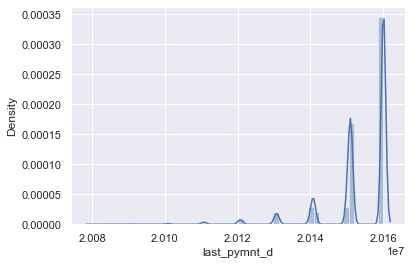

In [68]:
#Creating some visualisations for some attributes
sns.distplot(df['last_pymnt_d'])

c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='emp_length', ylabel='Density'>

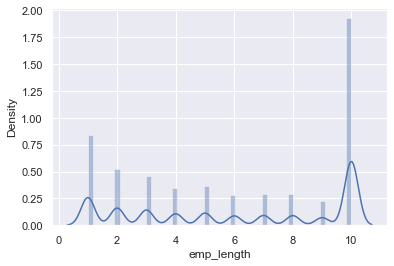

In [69]:
sns.distplot(df['emp_length'])

c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_credit_pull_d', ylabel='Density'>

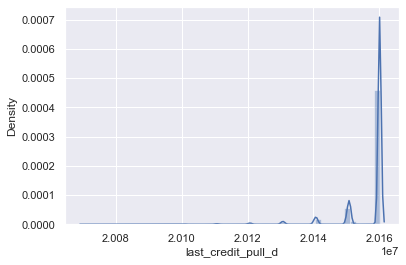

In [70]:
sns.distplot(df['last_credit_pull_d'])

In [71]:
#Null Replacement
#tot_cur_bal - median
#tot_coll_amt - median
#total_rev_hi_lim - median
#emp_length - mode
#last_pymnt_d - mode
#revol_utillist - median
#collections_12_mths_ex_med - mode
#last_credit_pull_d - mode


In [72]:
#Filling na with median or mode for the rest na including columns
med=['tot_cur_bal','tot_coll_amt','total_rev_hi_lim','revol_util']
mod=['emp_length','last_pymnt_d','collections_12_mths_ex_med','last_credit_pull_d']
for col in med:
    df[col]=df[col].fillna(df[col].median())

for col in mod:
    df[col]=df[col].fillna(df[col].mode()[0])

In [73]:
#Cleaning up zip_code to only have numbers
df['zip_code']=df['zip_code'].str.replace('[A-Za-z\s+<>]+', '')
#df['address']=df['zip_code']+df['addr_state']

C:\Users\mmoy\AppData\Local\Temp\ipykernel_16000\1128514257.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['zip_code']=df['zip_code'].str.replace('[A-Za-z\s+<>]+', '')


In [74]:
df['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [75]:
#Combning two rows that are the same in verification_status column
df['verification_status']=df['verification_status'].str.replace('Source Verified','Verified')

In [76]:
df['verification_status'].value_counts()

Verified        598227
Not Verified    257742
Name: verification_status, dtype: int64

In [77]:
#Encoding categorical values
cat_columns=['purpose','verification_status','home_ownership','sub_grade','initial_list_status','addr_state']
df[cat_columns] = df[cat_columns].astype('category').apply(lambda x: x.cat.codes)

In [78]:
#Checking weird values/distributions for each column
df.describe()

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,total_rec_late_fee,recoveries,total_pymnt,total_rec_int,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,default_ind
count,8.559690e+05,8.559690e+05,8.559690e+05,8.559690e+05,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000
mean,1.351456e+05,2.076865e+02,3.150587e+04,2.015381e+07,55.019863,0.014229,2.015741e+07,4.951227,2225.985295,0.004944,0.319530,47.089499,7653.296336,1755.046221,14745.571335,43.170764,13.192320,10.856619,2.895954,7.507119e+04,0.698889,2.014094e+07,2.562310,23.135392,18.122165,0.311621,1.997744e+07,0.680915,11.542447,0.194537,1.691053e+04,25.269269,0.482978,8284.830230,0.054286
std,1.486058e+05,1.006874e+04,3.625691e+04,9.466142e+03,23.805389,0.133707,7.093656e+03,62.478569,4864.966593,0.077333,3.609399,413.136043,7909.383591,2081.692980,8425.340005,10.985382,4.368365,6.452728,1.921844,6.426447e+04,0.458741,1.237151e+04,2.271336,15.156354,17.423629,0.857189,7.432285e+04,0.964033,5.308094,0.581585,2.222374e+04,11.818841,0.499710,8461.946669,0.226581
min,0.000000e+00,0.000000e+00,0.000000e+00,2.008010e+07,0.000000,0.000000,2.007050e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,36.000000,5.320000,0.000000,0.000000,0.000000e+00,0.000000,2.007060e+07,0.000000,0.000000,0.000000,0.000000,1.944010e+07,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,3.225000e+04,0.000000e+00,1.475000e+04,2.015100e+07,37.600000,0.000000,2.016010e+07,0.000000,285.420000,0.000000,0.000000,0.000000,1969.690000,451.270000,8000.000000,36.000000,9.990000,6.000000,1.000000,4.500000e+04,0.000000,2.013120e+07,2.000000,9.000000,11.880000,0.000000,1.994060e+07,0.000000,8.000000,0.000000,6.469000e+03,17.000000,0.000000,0.000000,0.000000
50%,8.100850e+04,0.000000e+00,2.380000e+04,2.016010e+07,55.900000,0.000000,2.016010e+07,0.000000,468.820000,0.000000,0.000000,0.000000,4976.160000,1076.910000,13000.000000,36.000000,12.990000,10.000000,1.000000,6.500000e+04,1.000000,2.014110e+07,2.000000,23.000000,17.610000,0.000000,1.999080e+07,0.000000,11.000000,0.000000,1.190300e+04,24.000000,0.000000,6290.250000,0.000000
75%,1.963730e+05,0.000000e+00,3.800000e+04,2.016010e+07,73.500000,0.000000,2.016010e+07,0.000000,849.160000,0.000000,0.000000,0.000000,10744.803649,2233.980000,20000.000000,60.000000,15.990000,15.000000,5.000000,9.000000e+04,1.000000,2.015070e+07,2.000000,36.000000,23.900000,0.000000,2.003040e+07,1.000000,14.000000,0.000000,2.085700e+04,32.000000,1.000000,13528.800000,0.000000
max,8.000078e+06,9.152545e+06,9.999999e+06,2.016010e+07,892.300000,20.000000,2.016010e+07,7002.190000,36475.590000,14.000000,358.680000,33520.270000,57777.579870,24205.620000,35000.000000,60.000000,28.990000,34.000000,5.000000,9.500000e+06,1.000000,2.015120e+07,13.000000,50.000000,9999.000000,39.000000,2.012110e+07,8.000000,90.000000,86.000000,2.904836e+06,169.000000,1.000000,49372.860000,1.000000


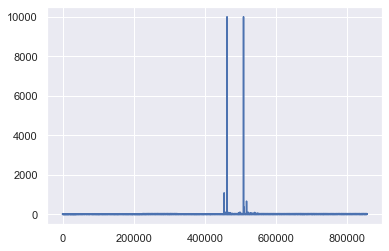

In [79]:
plt.plot(df['dti'])

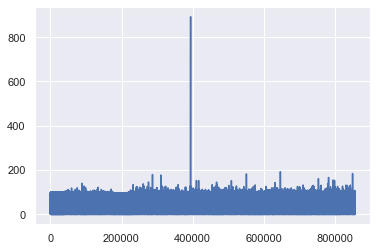

In [80]:
plt.plot(df['revol_util'])

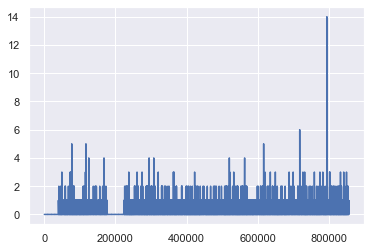

In [81]:
plt.plot(df['acc_now_delinq'])

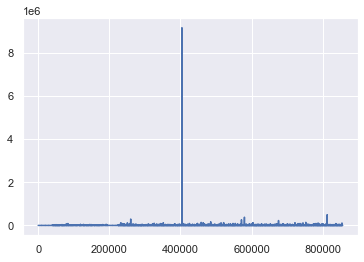

In [82]:
plt.plot(df['tot_coll_amt'])

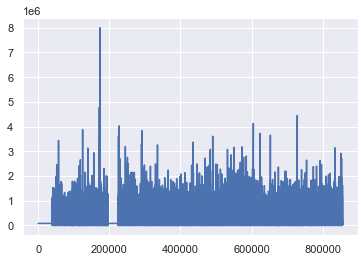

In [83]:
plt.plot(df['tot_cur_bal'])


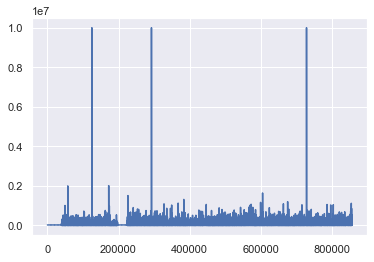

In [84]:
plt.plot(df['total_rev_hi_lim'])

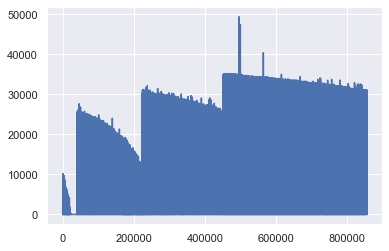

In [85]:
plt.plot(df['out_prncp'])

In [86]:
#Cleaning outliers
df=df[(df['dti']<150)&(df['revol_util']<200)&(df['acc_now_delinq']<13)&(df['tot_coll_amt']<1000000)&(df['tot_cur_bal']<4000000)&(df['total_rev_hi_lim']<2000000)]#&(df['out_prncp']<35001)]

## Model Related Exploration

In [87]:
#Checking distribution of default_ind
df['default_ind'].value_counts()

0    809486
1     46467
Name: default_ind, dtype: int64

<AxesSubplot:xlabel='default_ind', ylabel='Count'>

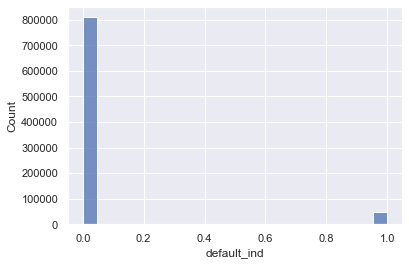

In [88]:
sns.histplot(df['default_ind'])

In [89]:
#Coparing values for default_ind 0 and 1
df.describe()

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,total_rec_late_fee,recoveries,total_pymnt,total_rec_int,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,default_ind
count,8.559530e+05,855953.000000,8.559530e+05,8.559530e+05,855953.000000,855953.000000,8.559530e+05,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,855953.000000,8.559530e+05,855953.000000,8.559530e+05,855953.000000,855953.000000,855953.000000,855953.000000,8.559530e+05,855953.000000,855953.000000,855953.000000,8.559530e+05,855953.000000,855953.000000,855953.000000,855953.000000
mean,1.351044e+05,196.997589,3.146559e+04,2.015381e+07,55.018946,0.014213,2.015741e+07,4.951320,2225.954351,0.004927,0.319535,47.090380,7653.194601,1755.037618,14745.446888,43.170842,13.192292,10.856581,2.895972,7.505985e+04,0.698887,2.014094e+07,2.562300,23.135345,18.096432,0.311601,1.997744e+07,0.680905,11.542445,0.194539,1.689607e+04,25.269217,0.482981,8284.788401,0.054287
std,1.479293e+05,1875.958045,3.094514e+04,9.466159e+03,23.788023,0.132851,7.093703e+03,62.479149,4864.855701,0.075833,3.609432,413.139855,7909.156888,2081.685376,8425.207041,10.985417,4.368377,6.452736,1.921845,6.400505e+04,0.458742,1.237156e+04,2.271321,15.156337,8.295702,0.857060,7.432245e+04,0.964021,5.308058,0.581589,2.147963e+04,11.818770,0.499711,8461.899359,0.226583
min,0.000000e+00,0.000000,0.000000e+00,2.008010e+07,0.000000,0.000000,2.007050e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,36.000000,5.320000,0.000000,0.000000,3.000000e+03,0.000000,2.007060e+07,0.000000,0.000000,0.000000,0.000000,1.944010e+07,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000
25%,3.225100e+04,0.000000,1.475000e+04,2.015100e+07,37.600000,0.000000,2.016010e+07,0.000000,285.420000,0.000000,0.000000,0.000000,1969.700000,451.270000,8000.000000,36.000000,9.990000,6.000000,1.000000,4.500000e+04,0.000000,2.013120e+07,2.000000,9.000000,11.880000,0.000000,1.994060e+07,0.000000,8.000000,0.000000,6.469000e+03,17.000000,0.000000,0.000000,0.000000
50%,8.100850e+04,0.000000,2.380000e+04,2.016010e+07,55.900000,0.000000,2.016010e+07,0.000000,468.820000,0.000000,0.000000,0.000000,4976.160000,1076.910000,13000.000000,36.000000,12.990000,10.000000,1.000000,6.500000e+04,1.000000,2.014110e+07,2.000000,23.000000,17.610000,0.000000,1.999080e+07,0.000000,11.000000,0.000000,1.190300e+04,24.000000,0.000000,6290.250000,0.000000
75%,1.963720e+05,0.000000,3.800000e+04,2.016010e+07,73.500000,0.000000,2.016010e+07,0.000000,849.150000,0.000000,0.000000,0.000000,10744.690000,2233.940000,20000.000000,60.000000,15.990000,15.000000,5.000000,9.000000e+04,1.000000,2.015070e+07,2.000000,36.000000,23.900000,0.000000,2.003040e+07,1.000000,14.000000,0.000000,2.085700e+04,32.000000,1.000000,13528.020000,0.000000
max,3.726495e+06,496651.000000,1.998700e+06,2.016010e+07,193.000000,20.000000,2.016010e+07,7002.190000,36475.590000,6.000000,358.680000,33520.270000,57777.579870,24205.620000,35000.000000,60.000000,28.990000,34.000000,5.000000,9.500000e+06,1.000000,2.015120e+07,13.000000,50.000000,137.400000,39.000000,2.012110e+07,8.000000,90.000000,86.000000,1.746716e+06,169.000000,1.000000,49372.860000,1.000000


In [90]:
df[df['default_ind']==0].describe()

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,total_rec_late_fee,recoveries,total_pymnt,total_rec_int,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,default_ind
count,8.094860e+05,809486.00000,8.094860e+05,8.094860e+05,809486.000000,809486.000000,8.094860e+05,809486.0,809486.000000,809486.000000,809486.000000,809486.0,809486.000000,809486.000000,809486.000000,809486.000000,809486.000000,809486.000000,809486.000000,8.094860e+05,809486.000000,8.094860e+05,809486.000000,809486.000000,809486.000000,809486.000000,8.094860e+05,809486.000000,809486.000000,809486.000000,8.094860e+05,809486.000000,809486.000000,809486.000000,809486.0
mean,1.367092e+05,202.28123,3.178842e+04,2.015453e+07,54.765201,0.014554,2.015779e+07,0.0,2327.612709,0.004983,0.197809,0.0,7727.511105,1732.069341,14755.344811,43.088261,13.030025,10.660354,2.881081,7.562992e+04,0.697026,2.014155e+07,2.538586,23.165379,18.076468,0.313487,1.997723e+07,0.663719,11.570040,0.197271,1.700544e+04,25.328926,0.494812,8742.900052,0.0
std,1.494875e+05,1909.03587,3.132902e+04,8.804849e+03,23.781397,0.134646,6.576599e+03,0.0,4981.039077,0.076116,2.772254,0.0,8022.150301,2069.669676,8427.011434,10.948743,4.316376,6.379134,1.920593,6.434444e+04,0.459544,1.205265e+04,2.240168,15.158145,8.314641,0.860214,7.452799e+04,0.950909,5.327386,0.588153,2.168495e+04,11.832226,0.499973,8459.633908,0.0
min,0.000000e+00,0.00000,0.000000e+00,2.008010e+07,0.000000,0.000000,2.007050e+07,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,500.000000,36.000000,5.320000,0.000000,0.000000,3.000000e+03,0.000000,2.007060e+07,0.000000,0.000000,0.000000,0.000000,1.944010e+07,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.0
25%,3.226100e+04,0.00000,1.480000e+04,2.015120e+07,37.400000,0.000000,2.016010e+07,0.0,289.020000,0.000000,0.000000,0.0,1935.470000,439.952500,8000.000000,36.000000,9.760000,6.000000,1.000000,4.600000e+04,0.000000,2.014010e+07,2.000000,9.000000,11.840000,0.000000,1.994060e+07,0.000000,8.000000,0.000000,6.481000e+03,17.000000,0.000000,0.000000,0.0
50%,8.100850e+04,0.00000,2.380000e+04,2.016010e+07,55.600000,0.000000,2.016010e+07,0.0,473.420000,0.000000,0.000000,0.0,4987.625000,1056.460000,13000.000000,36.000000,12.690000,10.000000,1.000000,6.500000e+04,1.000000,2.014120e+07,2.000000,23.000000,17.570000,0.000000,1.999080e+07,0.000000,11.000000,0.000000,1.193900e+04,24.000000,0.000000,7000.000000,0.0
75%,1.994810e+05,0.00000,3.850000e+04,2.016010e+07,73.200000,0.000000,2.016010e+07,0.0,876.130000,0.000000,0.000000,0.0,10897.148844,2202.260000,20000.000000,60.000000,15.610000,15.000000,5.000000,9.000000e+04,1.000000,2.015070e+07,2.000000,36.000000,23.880000,0.000000,2.003050e+07,1.000000,14.000000,0.000000,2.096400e+04,32.000000,1.000000,13966.977500,0.0
max,3.726495e+06,496651.00000,1.508600e+06,2.016010e+07,193.000000,20.000000,2.016010e+07,0.0,36475.590000,6.000000,286.747566,0.0,57777.579870,24205.620000,35000.000000,60.000000,28.990000,34.000000,5.000000,9.500000e+06,1.000000,2.015120e+07,13.000000,50.000000,137.400000,39.000000,2.012110e+07,8.000000,90.000000,86.000000,1.298783e+06,169.000000,1.000000,49372.860000,0.0


In [91]:
df[df['default_ind']==1].describe()

,tot_cur_bal,tot_coll_amt,total_rev_hi_lim,last_pymnt_d,revol_util,collections_12_mths_ex_med,last_credit_pull_d,collection_recovery_fee,last_pymnt_amnt,acc_now_delinq,total_rec_late_fee,recoveries,total_pymnt,total_rec_int,loan_amnt,term,int_rate,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,default_ind
count,4.646700e+04,46467.000000,4.646700e+04,4.646700e+04,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,4.646700e+04,46467.000000,46467.000000,46467.000000,46467.0
mean,1.071477e+05,104.953042,2.584162e+04,2.014132e+07,59.439342,0.008285,2.015084e+07,91.206597,454.998240,0.003938,2.440093,867.436067,6358.551737,2155.160268,14573.018486,44.609465,16.019092,14.274991,3.155379,6.512892e+04,0.731293,2.013023e+07,2.975402,22.612133,18.444234,0.278757,1.998112e+07,0.980309,11.061721,0.146943,1.499084e+04,24.229044,0.276885,304.179196,1.0
std,1.139474e+05,1152.924656,2.253252e+04,1.162533e+04,23.467230,0.096177,1.130573e+04,253.065131,650.022043,0.070703,10.067126,1559.671060,5424.353661,2243.479601,8391.928489,11.511174,4.301283,6.762807,1.925149,5.686452e+04,0.443292,1.294125e+04,2.725252,15.115410,7.950591,0.799408,7.054553e+04,1.127832,4.934646,0.449553,1.741112e+04,11.532493,0.447464,2219.353977,0.0
min,0.000000e+00,0.000000,0.000000e+00,2.008030e+07,0.000000,0.000000,2.009010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,36.000000,5.420000,0.000000,1.000000,4.080000e+03,0.000000,2.007080e+07,0.000000,0.000000,0.000000,0.000000,1.955010e+07,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,1.0
25%,3.207650e+04,0.000000,1.450000e+04,2.014010e+07,43.200000,0.000000,2.014120e+07,0.000000,237.850000,0.000000,0.000000,0.000000,2496.360000,686.065000,8000.000000,36.000000,13.050000,9.000000,1.000000,4.000000e+04,0.000000,2.012100e+07,2.000000,9.000000,12.610000,0.000000,1.995040e+07,0.000000,8.000000,0.000000,6.226500e+03,16.000000,0.000000,0.000000,1.0
50%,8.100850e+04,0.000000,2.380000e+04,2.014110e+07,61.500000,0.000000,2.015120e+07,0.000000,375.880000,0.000000,0.000000,16.250000,4855.880000,1434.080000,12700.000000,36.000000,15.800000,14.000000,4.000000,5.600000e+04,1.000000,2.013080e+07,2.000000,22.000000,18.380000,0.000000,1.999110e+07,1.000000,10.000000,0.000000,1.134900e+04,23.000000,0.000000,0.000000,1.0
75%,1.378180e+05,0.000000,2.890000e+04,2.015050e+07,78.000000,0.000000,2.016010e+07,24.915500,568.700000,0.000000,0.000000,1214.165000,8606.465000,2778.530000,20000.000000,60.000000,18.920000,19.000000,5.000000,7.800000e+04,1.000000,2.014050e+07,2.000000,35.000000,24.140000,0.000000,2.003040e+07,2.000000,14.000000,0.000000,1.921300e+04,31.000000,1.000000,0.000000,1.0
max,3.437283e+06,95806.000000,1.998700e+06,2.016010e+07,129.400000,4.000000,2.016010e+07,7002.190000,34833.350000,5.000000,358.680000,33520.270000,46199.440000,20610.170000,35000.000000,60.000000,28.990000,34.000000,5.000000,8.706582e+06,1.000000,2.015090e+07,13.000000,50.000000,39.980000,18.000000,2.012040e+07,8.000000,76.000000,12.000000,1.746716e+06,110.000000,1.000000,35000.000000,1.0


<AxesSubplot:xlabel='recoveries', ylabel='Count'>

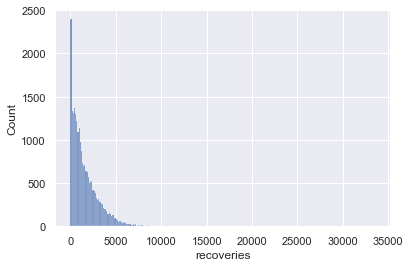

In [92]:
#Checking non-zero recoveries distribution
sns.histplot(df[df['recoveries']!=0]['recoveries'])

In [93]:
#Checking recovery values when default_ind is 1
df[df['default_ind']==1]['recoveries'].value_counts()

0.00       22280
200.00        10
11.70          9
14.28          9
100.00         8
           ...  
2219.00        1
1718.67        1
690.76         1
953.27         1
5834.18        1
Name: recoveries, Length: 22627, dtype: int64

c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='out_prncp', ylabel='Density'>

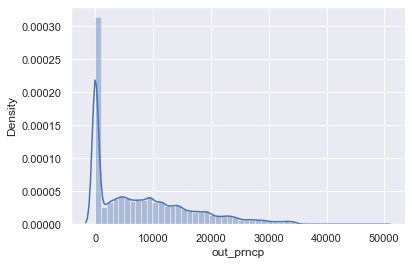

In [94]:
#Investigating out_prncp as it is a good predictor of defalt_ind
sns.distplot(df['out_prncp'])

c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='grade', ylabel='Density'>

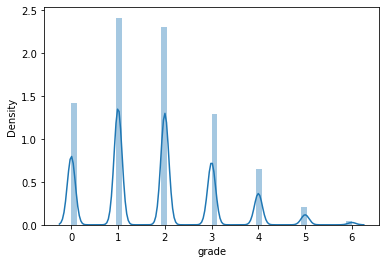

In [5]:
#Looking at grade distribution for clustering model
sns.distplot(df['grade'])

c:\Users\mmoy\Documents\XYZ Corp\xyz_corp_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sub_grade', ylabel='Density'>

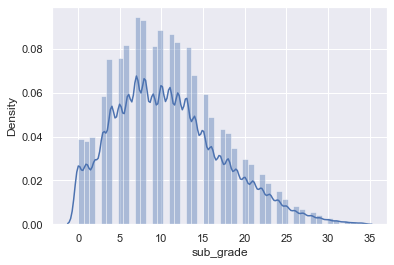

In [ ]:
#Looking at sub-grade distribution for clustering model
sns.distplot(df['sub_grade'])